In [158]:
from skimage import data
from skimage import img_as_float
from skimage.feature import blob_dog, blob_log, blob_doh, canny
from skimage import io
from skimage.external import tifffile
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage.exposure import rescale_intensity, equalize_hist, equalize_adapthist

from scipy import ndimage as ndi
import warnings

from math import sqrt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

## Load image

In [2]:
image = tifffile.imread('data/2015-09-21_AB_20x_LMH-15-D007-RLL-10B1-10_003.tif')

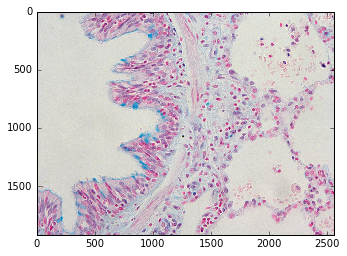

In [124]:
plt.imshow(img_as_float(image))
pass

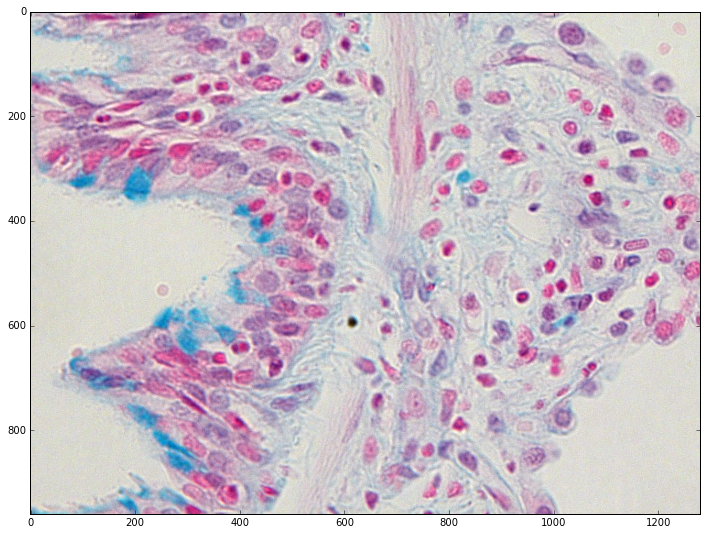

In [129]:
h, w, c = image.shape
plt.figure(figsize=(14, 9))
img = img_as_float(image[h//4:(3*h)//4, w//4:(3*w)//4])
plt.imshow(img)
pass

### We will work with the grayscale image

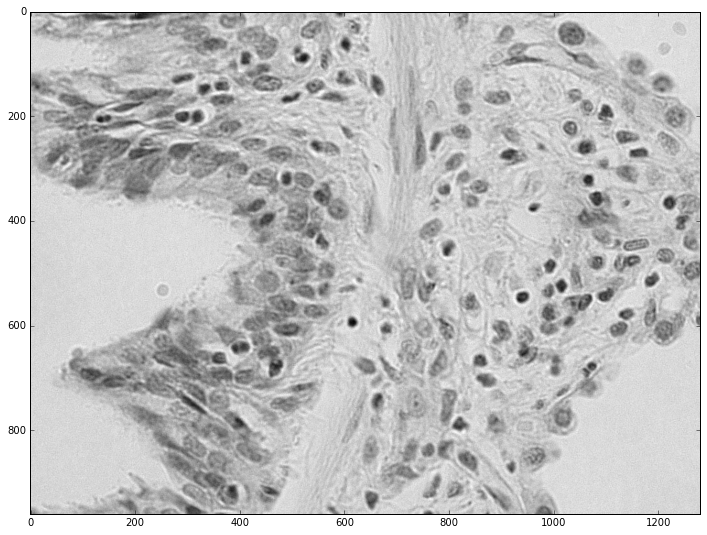

In [132]:
plt.gray()
img2 = rgb2gray(img)
plt.figure(figsize=(14, 9))
plt.imshow(img2)
pass

## Objective - find the cell nuclei

### Using thresholds

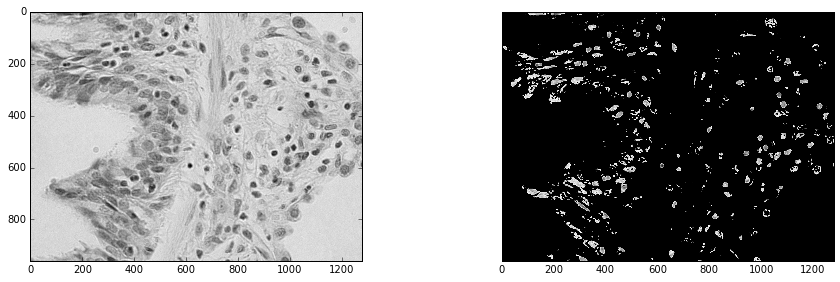

In [155]:
mask = img2 > 0.5
img3 = img2.copy()
img3[mask] = 0

fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(img2)
axes[1].imshow(img3)
plt.tight_layout()
pass

## Edge-based segmentation

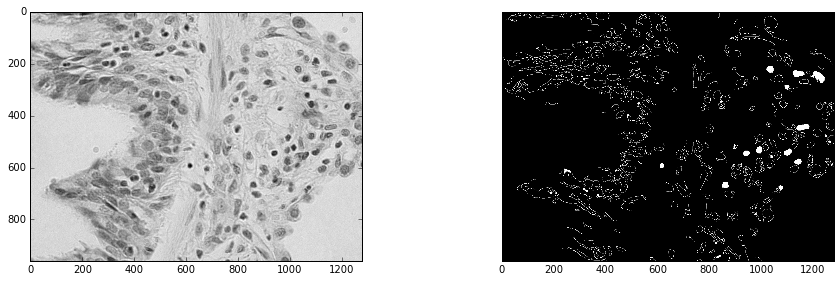

In [171]:
edges = canny(img2, high_threshold=0.5)
img4 = ndi.binary_fill_holes(edges)

plt.gray()
fig, axes = plt.subplots(1, 2, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes[0].imshow(img2)
axes[1].imshow(img4)
plt.tight_layout()
pass

## Find blobs

In [8]:
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=30, threshold=.1)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.01)

blobs_list = [blobs_log, blobs_dog, blobs_doh]

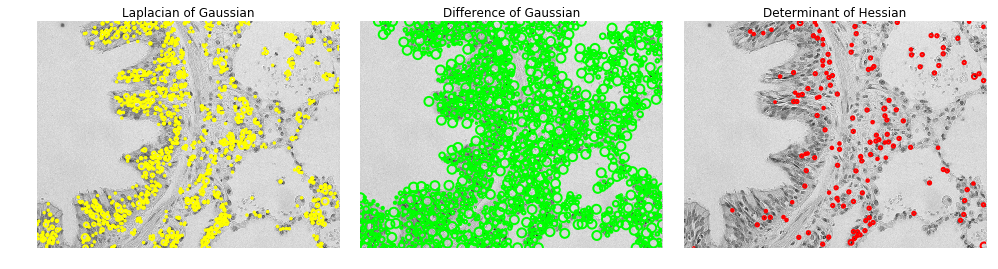

In [9]:
colors = ['yellow', 'lime', 'red']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian', 'Determinant of Hessian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(14, 4), sharex=True, sharey=True,
                         subplot_kw={'adjustable': 'box-forced'})
axes = axes.ravel()
for i, (blobs, color, title) in enumerate(sequence):
    ax = axes[i]
    ax.set_title(title)
    ax.imshow(image_gray, interpolation='nearest', cmap='gray')
    ax.set_axis_off()
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)
plt.tight_layout()